## Limits of Random Variables ##
Richard Sowers <r-sowers@illinois.edu> 2018-04-19

Copyright 2018 University of Illinois Board of Trustees. All Rights Reserved. Licensed under the MIT license

In [1]:
import numpy
import datetime
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
N=100 #number of simulations
delta=0.001 # scaling factor

## Geometric to exponential ##

In [3]:
numpy.random.seed(0)
samples=delta*scipy.stats.geom.rvs(delta,size=N)
print(samples[:10])

[0.796 1.256 0.923 0.787 0.551 1.038 0.576 2.223 3.314 0.484]


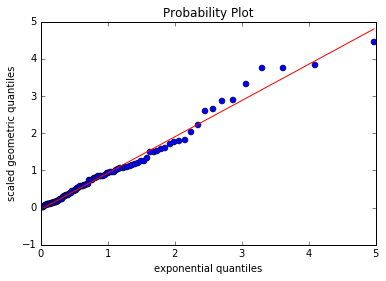

In [4]:
plt.figure()
scipy.stats.probplot(samples, dist=scipy.stats.expon, plot=plt)
plt.xlabel("exponential quantiles")
plt.ylabel("scaled geometric quantiles")
plt.show()

## Binomial to Poisson ##

In [5]:
numpy.random.seed(0)
N_binomial=int(1/delta)
p_binomial=delta
samples=scipy.stats.binom.rvs(N_binomial,p_binomial,size=10000)
N_range=10
values=range(N_range)

In [6]:
temp=scipy.stats.itemfreq(samples)
print(temp)
values=temp[:,0]
emp_prob=temp[:,1]/len(samples)
print(emp_prob)

[[   0 3700]
 [   1 3670]
 [   2 1835]
 [   3  621]
 [   4  140]
 [   5   26]
 [   6    3]
 [   7    5]]
[3.700e-01 3.670e-01 1.835e-01 6.210e-02 1.400e-02 2.600e-03 3.000e-04
 5.000e-04]


In [7]:
th_prob=scipy.stats.poisson.pmf(values,1)
print(th_prob)

[3.67879441e-01 3.67879441e-01 1.83939721e-01 6.13132402e-02
 1.53283100e-02 3.06566201e-03 5.10943668e-04 7.29919526e-05]


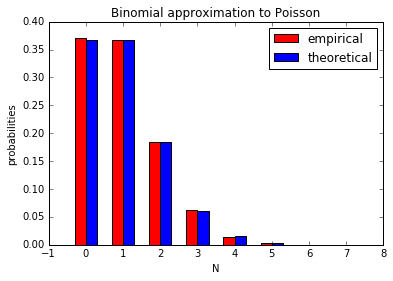

In [8]:
width=0.3
plt.figure()
plt.bar(values-width,emp_prob,width=width,color="red",label="empirical")
plt.bar(values,th_prob,width=width,color="blue",label="theoretical")
plt.legend()
plt.xlabel("N")
plt.ylabel("probabilities")
plt.title("Binomial approximation to Poisson")
plt.show()

### Binomial to Gaussian ###

In [9]:
numpy.random.seed(0)
N_binomial=int(1/delta)
p_binomial=0.5
samples=(2*numpy.array(scipy.stats.binom.rvs(N_binomial,p_binomial,size=N))-
         N_binomial)/numpy.sqrt(N_binomial)

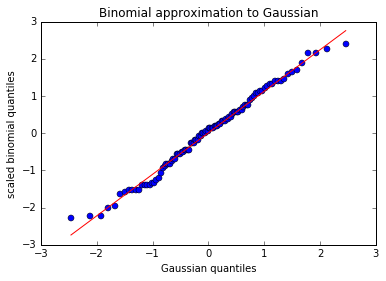

In [10]:
plt.figure()
scipy.stats.probplot(samples, dist="norm", plot=plt)
plt.xlabel("Gaussian quantiles")
plt.ylabel("scaled binomial quantiles")
plt.title("Binomial approximation to Gaussian")
plt.show()